# **Aprendizaje no supervisado**
## **Análisis de Componenetes Principales**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [9]:
class PCA:
    '''
    Implementación de una clase para Análisis de Componentes Principales
    '''

    def __init__(self, n_componentes = 2):
        """
        Constructor de objetos PCA

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas
            n_componentes (int): Número de componentes a utilizar
        """

        self.n_componentes = n_componentes
        self.valores_propios = None
        self.vectores_propios = None

    def estandarizar(self, data):
        """
        Función para estandarizar datos númericos (media 0 y varianza 1)

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas

        Return:
            z (numpy array): Datos estandarizados
        """

        #Se resta la media de cada caracteristica a cada caracteristica y se divide con la DS de cada caracteristica
        z = (data - np.mean(data, axis = 0)) / (np.std(data, axis = 0))
        return z

    def calc_matriz_covarianza(self):
        """
        Función para calcular la matriz de covarianza de un numpy array

        Return:
            covmat (numpy array): Matriz de covarianza
        """

        covmat = np.cov(self.datos_estandarizados.T)

        return covmat

    def valores_vectores_propios(self, covmat):
        #Se calculan los valores y vectores propios de la matrix de covarianza
        valores_propios, vectores_propios = np.linalg.eig(covmat)

        return valores_propios, vectores_propios

    def vector_caracteristicas(self, valores_propios, vectores_propios):
        #Se seleccionan los indices de los n_componentes con los mayores valores propios
        n_cols = np.argsort(valores_propios)[::-1][:self.n_componentes]

        #Se seleccionan los n_componentes vectores propios con mayor poder explicativo
        vector_caracteristica = vectores_propios[:,n_cols]
        print("Caracteristicas seleccionadas para el vector de caracteristicas")
        print(n_cols)
        return vector_caracteristica

    def proyectar(self, vectores_caracteristica):
        """
        Función para proyectar los datos originales sobre el espacio de los componentes de PCA

        Parametros:
            vectores_caracteristica (numpy array): Vector de caracteristica

        Return:
            P (numpy array): Datos originales proyectados al vector de caracteristicas
        """

        P = np.dot(self.datos_estandarizados, vectores_caracteristica)
        return P

    def dibujar(self, titulo, features, target, pca_data):
        fig ,ax = plt.subplots(1, 1, figsize=(10,6))

                #chart tags
        ax.set_title(titulo)
        ax.set_xlabel(features[0])
        ax.set_ylabel(features[1])

        #drawing the scatterplot
        sns.scatterplot(
            x = pca_data[:,0],
            y = pca_data[:,1],
            hue = target
        )

        print(pca_data.shape)
        sns.despine()
        plt.show()

    def run(self, data):

        self.n_muestras = data.shape[0]
        self.datos_estandarizados = self.estandarizar(data)

        covmat = self.calc_matriz_covarianza()

        self.valores_propios, self.vectores_propios = self.valores_vectores_propios(covmat)

        self.vector_caracteristica = self.vector_caracteristicas(self.valores_propios, self.vectores_propios)

        datos_proyectados = self.proyectar(self.vector_caracteristica)

        return datos_proyectados

In [10]:
#Se carga el DataSet
diabetes = datasets.load_diabetes()

data = diabetes.data
target = diabetes.target

In [11]:
#Experimento 1
pca = PCA()
datos_pca = pca.run(data)


Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]


In [12]:
print("% de varianza descrita por cada caracteristica")
print(pca.valores_propios/np.sum(pca.valores_propios) * 100)

% de varianza descrita por cada caracteristica
[40.2421075  14.92319678 12.05966259  9.55476403  0.0856073   0.78320024
  6.62181391  4.33682036  6.02717076  5.36565652]


(442, 2)


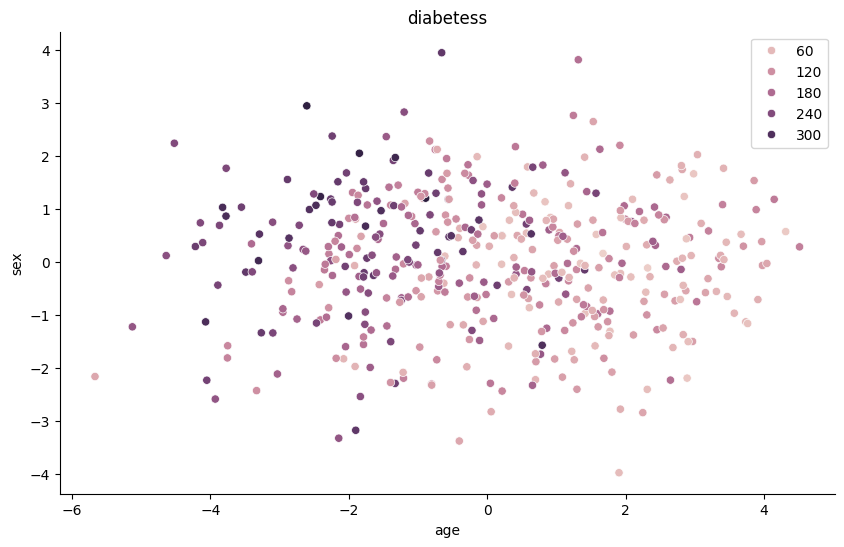

In [13]:
pca.dibujar("diabetess", diabetes.feature_names[0:2], target, datos_pca)

##**Taller PCA # 1**

1. Utilizar dataset blue jays
2. Realizar analisis bivariado todos contra todos tal como se explicó
3. Interpretar resultados del analisis bivariado
4. Calcule la matriz de covarianza y sus valores y vectores propios (discuta los resultados con su grupo)
5. Determine cuantos y cuales componentes son necesarios para describir el 90% de la varianza de los datos

**1**

In [14]:
#Llamamos el documento csv blue jays y lo asignamos a una varible, ademas cremos un traget para definir los colores entre masculino y femeninos del DF
blue_jays = pd.read_csv("/content/blue_jays.csv")
data = blue_jays
target = blue_jays[data.columns[1]]

 2 Creamos las graficas correspondientes al DF de todos contra todos y analizamos resultados

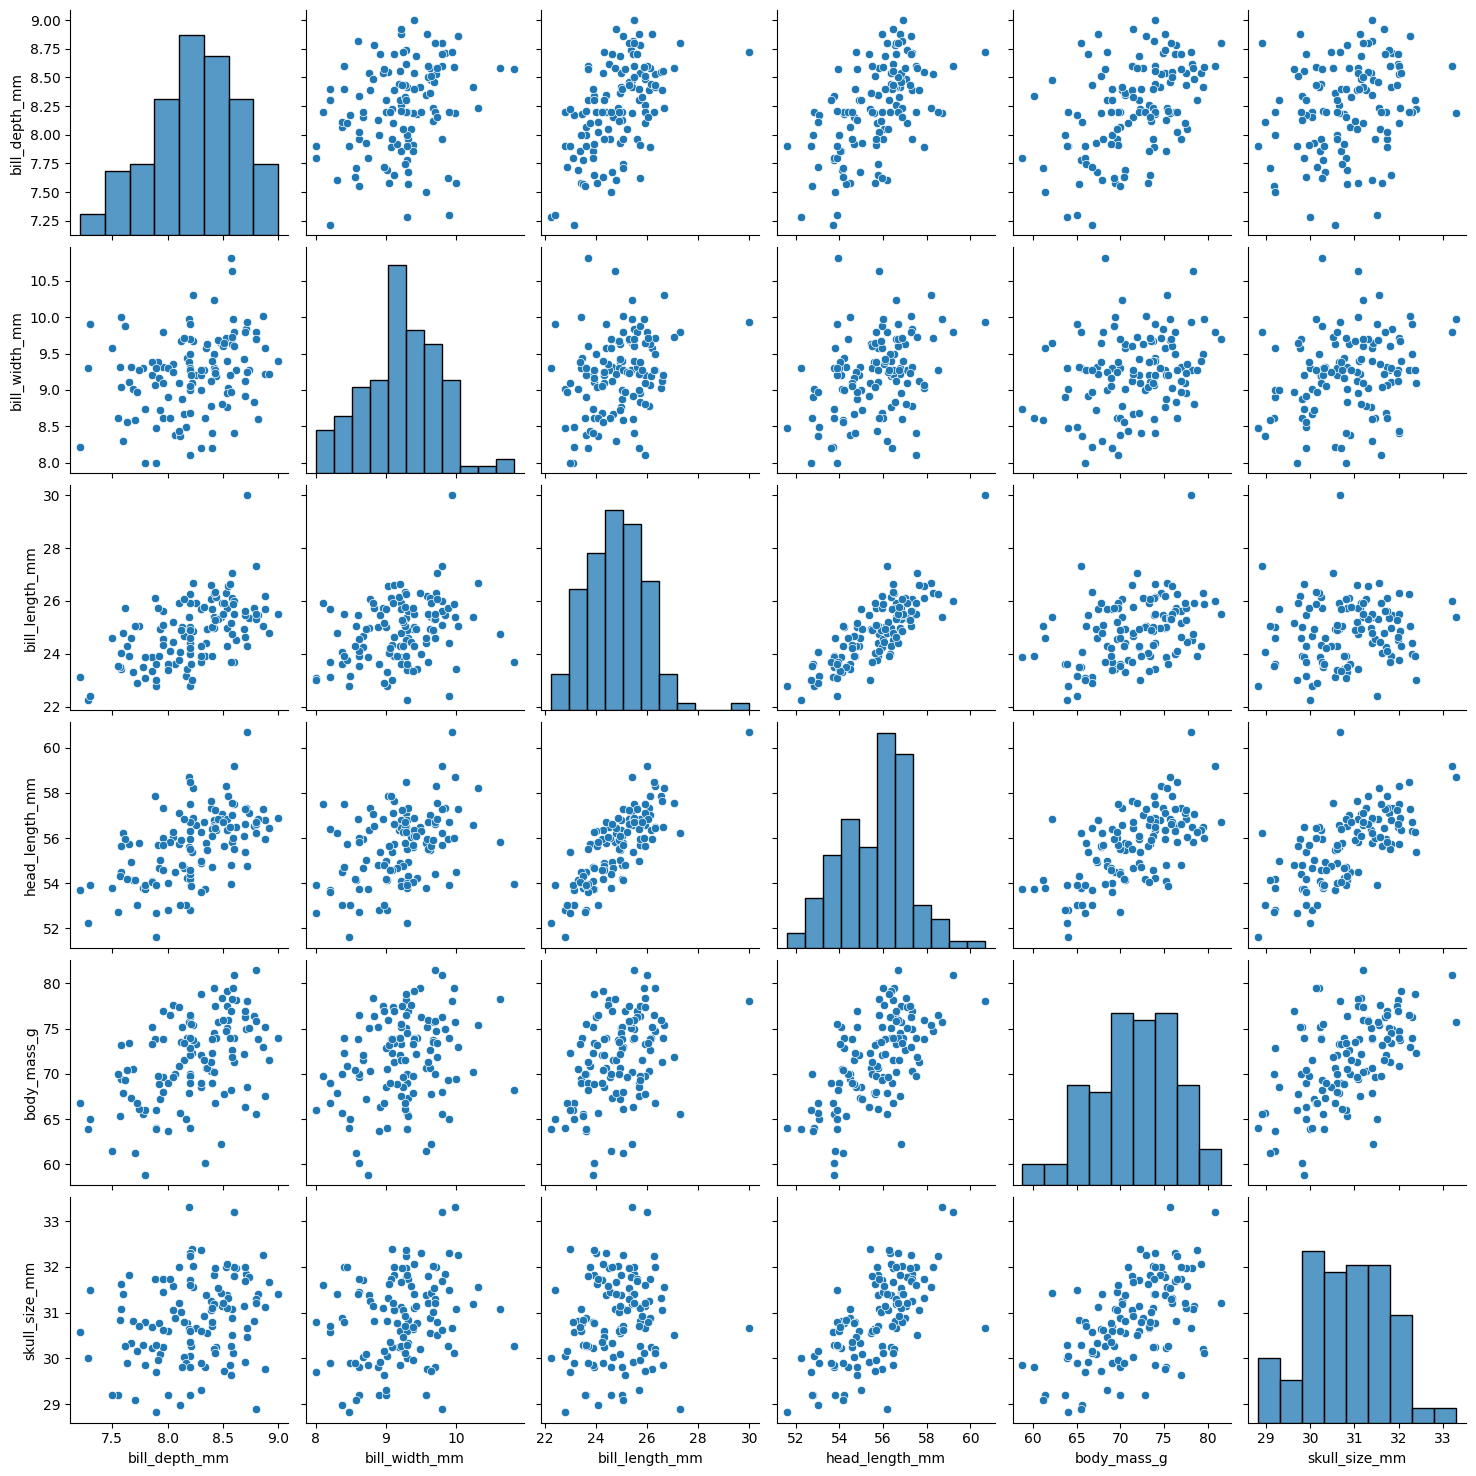

In [15]:
sns.pairplot(blue_jays)
plt.show()

Figura 1. En esta figura se realiza la comparacion de todods contra todos, solo
se tomaran algunas de las graficas y se realizara la inter pretacion.
Petal Length vs Petal Width: Este gráfico muestra cómo el largo se relaciona con el ancho. Una correlación positiva indicaría que a medida que el largo de las alas aumenta, el ancho también tiende a aumentar.
Sepal Length vs Petal Length: Este gráfico muestra la relación entre el Sepal Length y el Petal Length. Con una correlación positiva indica que a medida que el Sepal Length aumenta, el Petal Length también tiende a aumentar.
Además de las relaciones específicas mencionadas, pueden observarse correlaciones generales entre todas las variables. Esto ayuda a identificar patrones consistentes y hacer predicciones basadas en las relaciones entre las variables.

4) Limpiamos los datos y creamos una categorizacion para la columna "sex" con valores de 1 para masculino y 0 para femenino. Empezamos la creacion matriz de covarianza y sus vectores.

In [16]:
data = data.drop(columns=['bird_id'])
data['sex'] = data['sex'].map({'M': 1, 'F': 0})
pca = PCA()
datos_pca = pca.run(data)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]


In [17]:
print("% de varianza descrita por cada caracteristica o valor propio")
print((pca.valores_propios/np.sum(pca.valores_propios))*100)

% de varianza descrita por cada caracteristica o valor propio
[5.33258357e+01 1.45819761e+01 1.22903762e+01 4.12258164e+00
 8.13453697e+00 7.54466779e+00 2.55332050e-05]


Se eviencia que al tomar lo primeros 5 componetes se completa el 92%, siendo esta cantidad de componentes para tener un resultado aceptable.

In [18]:
#Para describir el 90% de la varianza se necesitan 5 componentes
np.cumsum((pca.valores_propios/np.sum(pca.valores_propios))*100)

array([ 53.32583575,  67.9078119 ,  80.19818806,  84.3207697 ,
        92.45530667,  99.99997447, 100.        ])

In [19]:
# Imprimir la matriz de covarianza
pca.calc_matriz_covarianza()

array([[1.00819672, 0.56057996, 0.18466736, 0.55023647, 0.65977701,
        0.36291763, 0.42437152],
       [0.56057996, 1.00819672, 0.27233231, 0.55670766, 0.56227686,
        0.476727  , 0.24871341],
       [0.18466736, 0.27233231, 1.00819672, 0.29890052, 0.36473353,
        0.2921213 , 0.2410161 ],
       [0.55023647, 0.55670766, 0.29890052, 1.00819672, 0.8215004 ,
        0.41318744, 0.11355263],
       [0.65977701, 0.56227686, 0.36473353, 0.8215004 , 1.00819672,
        0.63460408, 0.6732668 ],
       [0.36291763, 0.476727  , 0.2921213 , 0.41318744, 0.63460408,
        1.00819672, 0.55739457],
       [0.42437152, 0.24871341, 0.2410161 , 0.11355263, 0.6732668 ,
        0.55739457, 1.00819672]])

(123, 2)


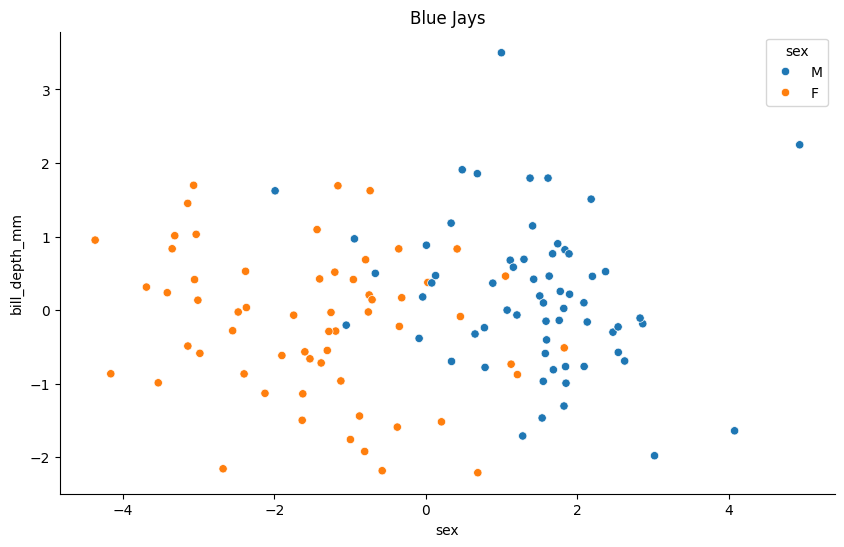

In [20]:
pca.dibujar("Blue Jays",[data.columns[0], data.columns[1]], target, datos_pca)

En esta grafica se muestra la relación entre el sexo y la profundidad del pico en mm, con puntos azules representando machos y puntos naranjas representando hembras. La variabilidad en la profundidad del pico es evidente en ambos sexos, y al comparar los puntos, podemos observar posibles diferencias en la morfología del pico entre machos y hembras.